# Challenge 2:
# Seasonality (Top 5 Ocurrences for 'question_topic')

## Import Libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [2]:
# Import full dataset with predicted values
# Import dataset excluding rows where 'question_topic' is missing
# See 'data_wrangling_new_features.ipynb' & 'estimate_missing_topic_no_relabel.ipynb'

pred = pd.read_csv('../data/question_topic_no_missing.csv', usecols=[0,4,14,24,25,26]) # Includes predicted values
no_pred = pd.read_csv('../data/question_topic_valid.csv', usecols=[0,4,14,24,25,26]) # Only records without missing 'question_topic'

## Remove duplicate questions

In [3]:
# Drops rows based on duplicate 'question_id'
pred.drop_duplicates(subset='question_id',inplace=True)
pred.reset_index(drop=True, inplace=True)

no_pred.drop_duplicates(subset='question_id',inplace=True)
no_pred.reset_index(drop=True, inplace=True)

## Split Datasets Into Separate Countries & Reduce to Top 5

In [4]:
# Split dataset by country - 'ug', 'ke', 'tz'
# NB: The dataset for gb is too small and incomplete to perform a meaningful analysis so has been excluded.
ke_pred = pred[pred.question_user_country_code == 'ke'].reset_index()
tz_pred = pred[pred.question_user_country_code == 'tz'].reset_index()
ug_pred = pred[pred.question_user_country_code == 'ug'].reset_index()

ke_no_pred = no_pred[no_pred.question_user_country_code == 'ke'].reset_index()
tz_no_pred = no_pred[no_pred.question_user_country_code == 'tz'].reset_index()
ug_no_pred = no_pred[no_pred.question_user_country_code == 'ug'].reset_index()

### Kenya

The years 2017 and 2022 have too many missing months so these years will not be plotted.

In [5]:
# Drop records from the years 2017 and 2022
ke_pred.drop(ke_pred[ke_pred.year.isin([2017, 2022])].index, inplace=True)
ke_pred.reset_index(drop=True, inplace=True)

ke_no_pred.drop(ke_no_pred[ke_no_pred.year.isin([2017, 2022])].index, inplace=True)
ke_no_pred.reset_index(drop=True, inplace=True)

# The 5 most consistently highests counts between 2018 and 2021
highest_counts_ke = ['cattle','chicken','maize','poultry','tomato']

ke_pred = ke_pred[ke_pred.question_topic.isin(highest_counts_ke)]
ke_no_pred = ke_no_pred[ke_no_pred.question_topic.isin(highest_counts_ke)]

### Tanzania

Tanzania has missing months for 2017, 2018 and 2021 so these years will not be plotted.

In [6]:
# Drop records from the years 2017 and 2018
tz_pred.drop(tz_pred[tz_pred.year.isin([2017, 2018, 2021])].index, inplace=True)
tz_pred.reset_index(drop=True, inplace=True)

tz_no_pred.drop(tz_no_pred[tz_no_pred.year.isin([2017, 2018, 2021])].index, inplace=True)
tz_no_pred.reset_index(drop=True, inplace=True)

# The 5 most consistently highests counts in 2019 and 2020
highest_counts_tz = ['bean','maize','poultry','rice','tomato']

tz_pred = tz_pred[tz_pred.question_topic.isin(highest_counts_tz)]
tz_no_pred = tz_no_pred[tz_no_pred.question_topic.isin(highest_counts_tz)]

### Uganda

Uganda has incomplete months for 2017 and 2021 so these years will not be included in the plot.

In [7]:
# Drop records from the years 2017 and 2022
ug_pred.drop(ug_pred[ug_pred.year.isin([2017,2021])].index, inplace=True)
ug_pred.reset_index(drop=True, inplace=True)

ug_no_pred.drop(ug_no_pred[ug_no_pred.year.isin([2017,2021])].index, inplace=True)
ug_no_pred.reset_index(drop=True, inplace=True)

# The 5 most consistently highests counts between 2018 and 2021
# NB: Slight difference between the dataset with only no missing values and the one including predicted values
highest_counts_ug_pred = ['bean','cattle','chicken','maize','tomato']
highest_counts_ug_no_pred = ['cattle','chicken','maize','pig','tomato']

ug_pred = ug_pred[ug_pred.question_topic.isin(highest_counts_ug_pred)]
ug_no_pred = ug_no_pred[ug_no_pred.question_topic.isin(highest_counts_ug_no_pred)]

## Barplots for Kenya, Tanzania and Uganda

In [8]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

### Kenya Excluding Missing Values

In [9]:
ke_no_pred_plot = ke_no_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
ke_no_pred_plot = ke_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ke_no_pred_plot = ke_no_pred_plot.groupby(['year','month']).head(2).reset_index(drop=True)

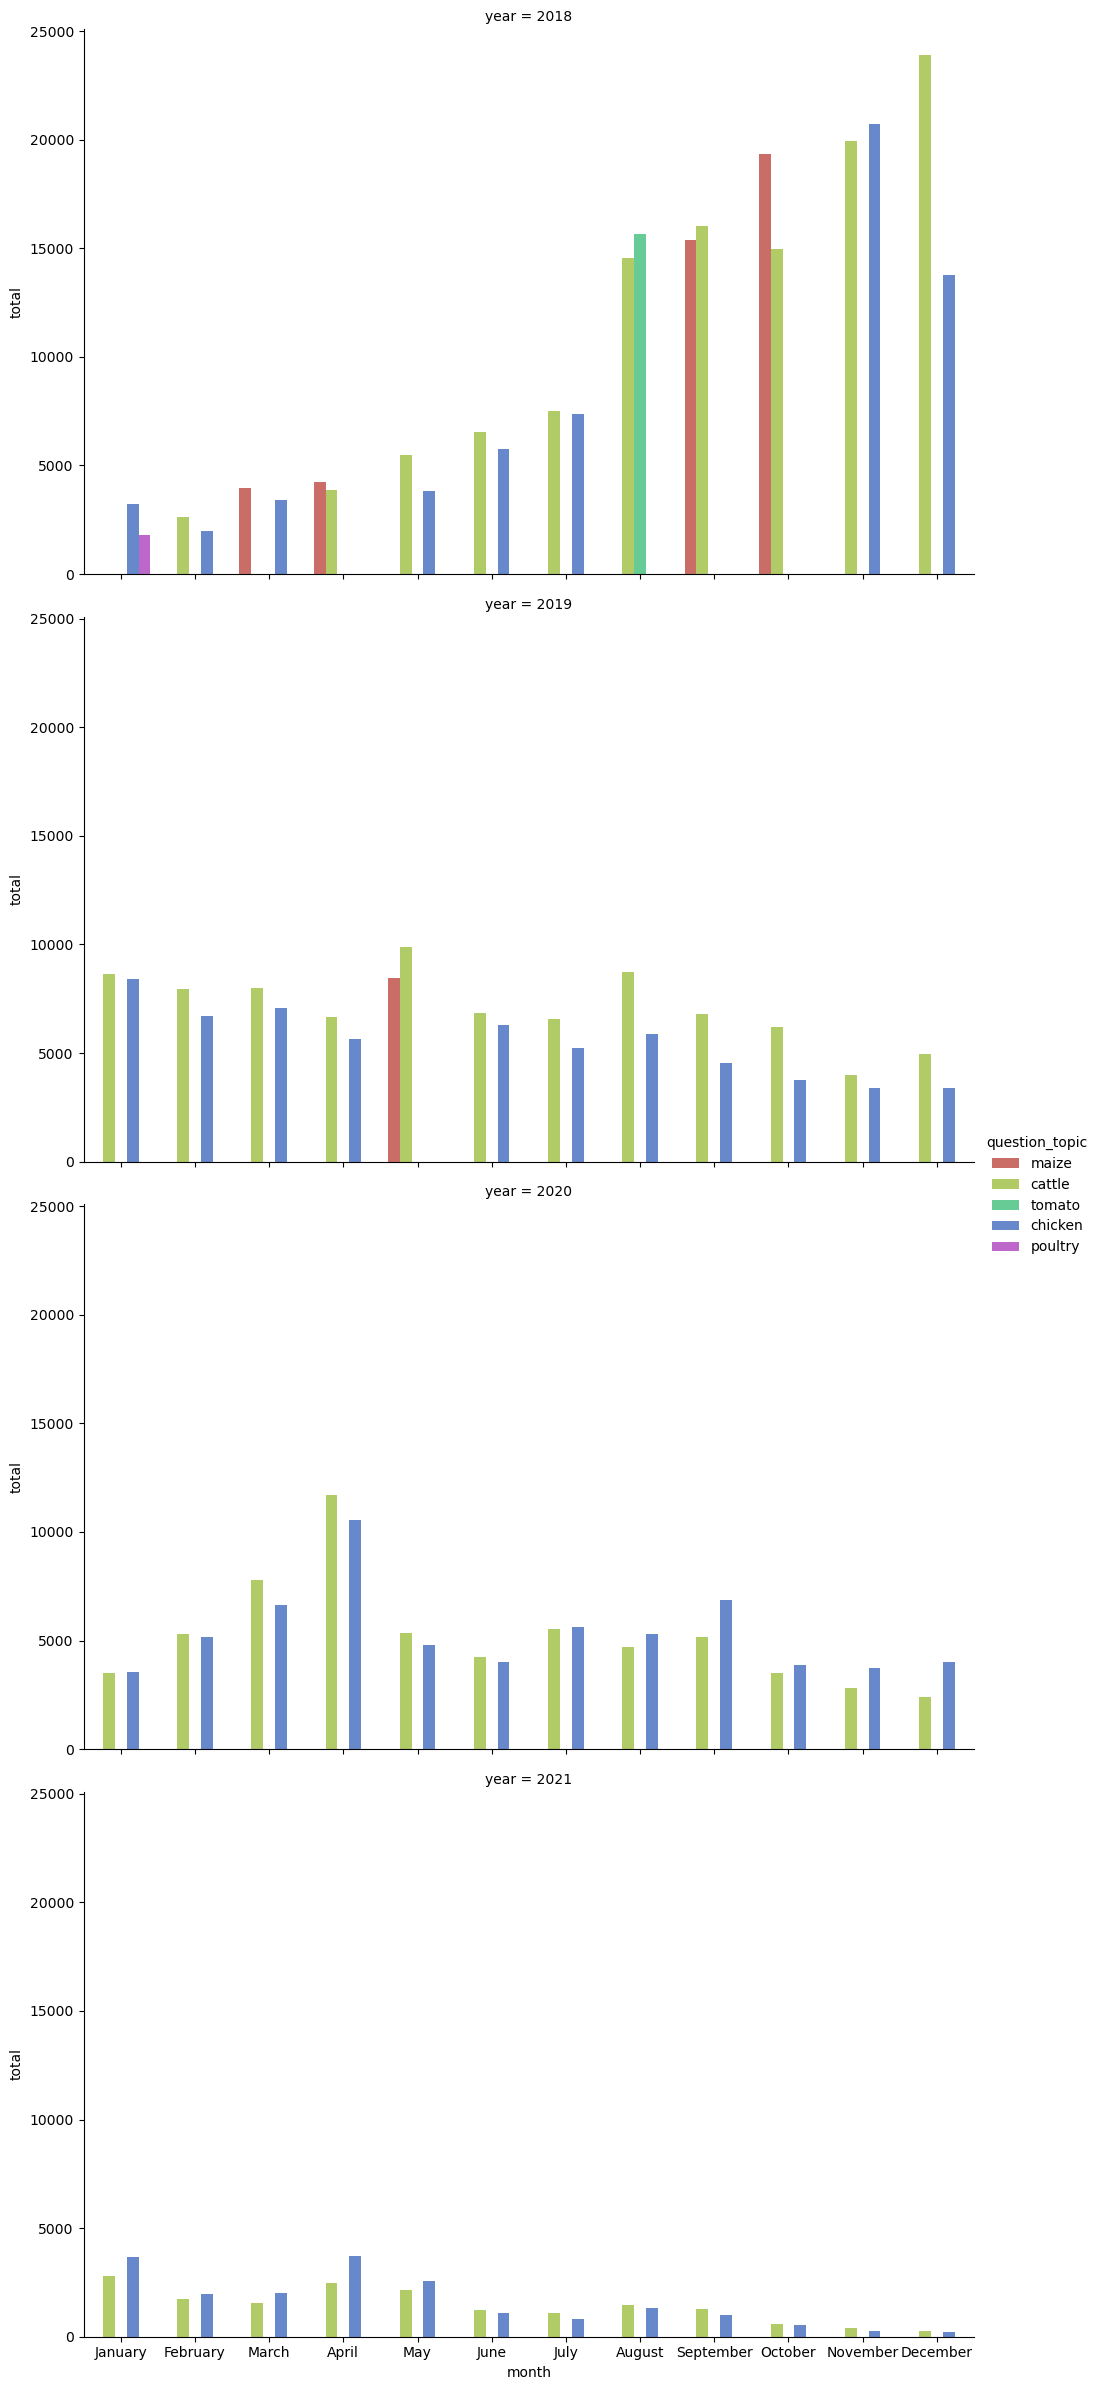

In [10]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=ke_no_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Kenya Including Predicted Values For Missing Values

In [11]:
ke_pred_plot = ke_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
ke_pred_plot = ke_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ke_pred_plot = ke_pred_plot.groupby(['year','month']).head(2).reset_index(drop=True)

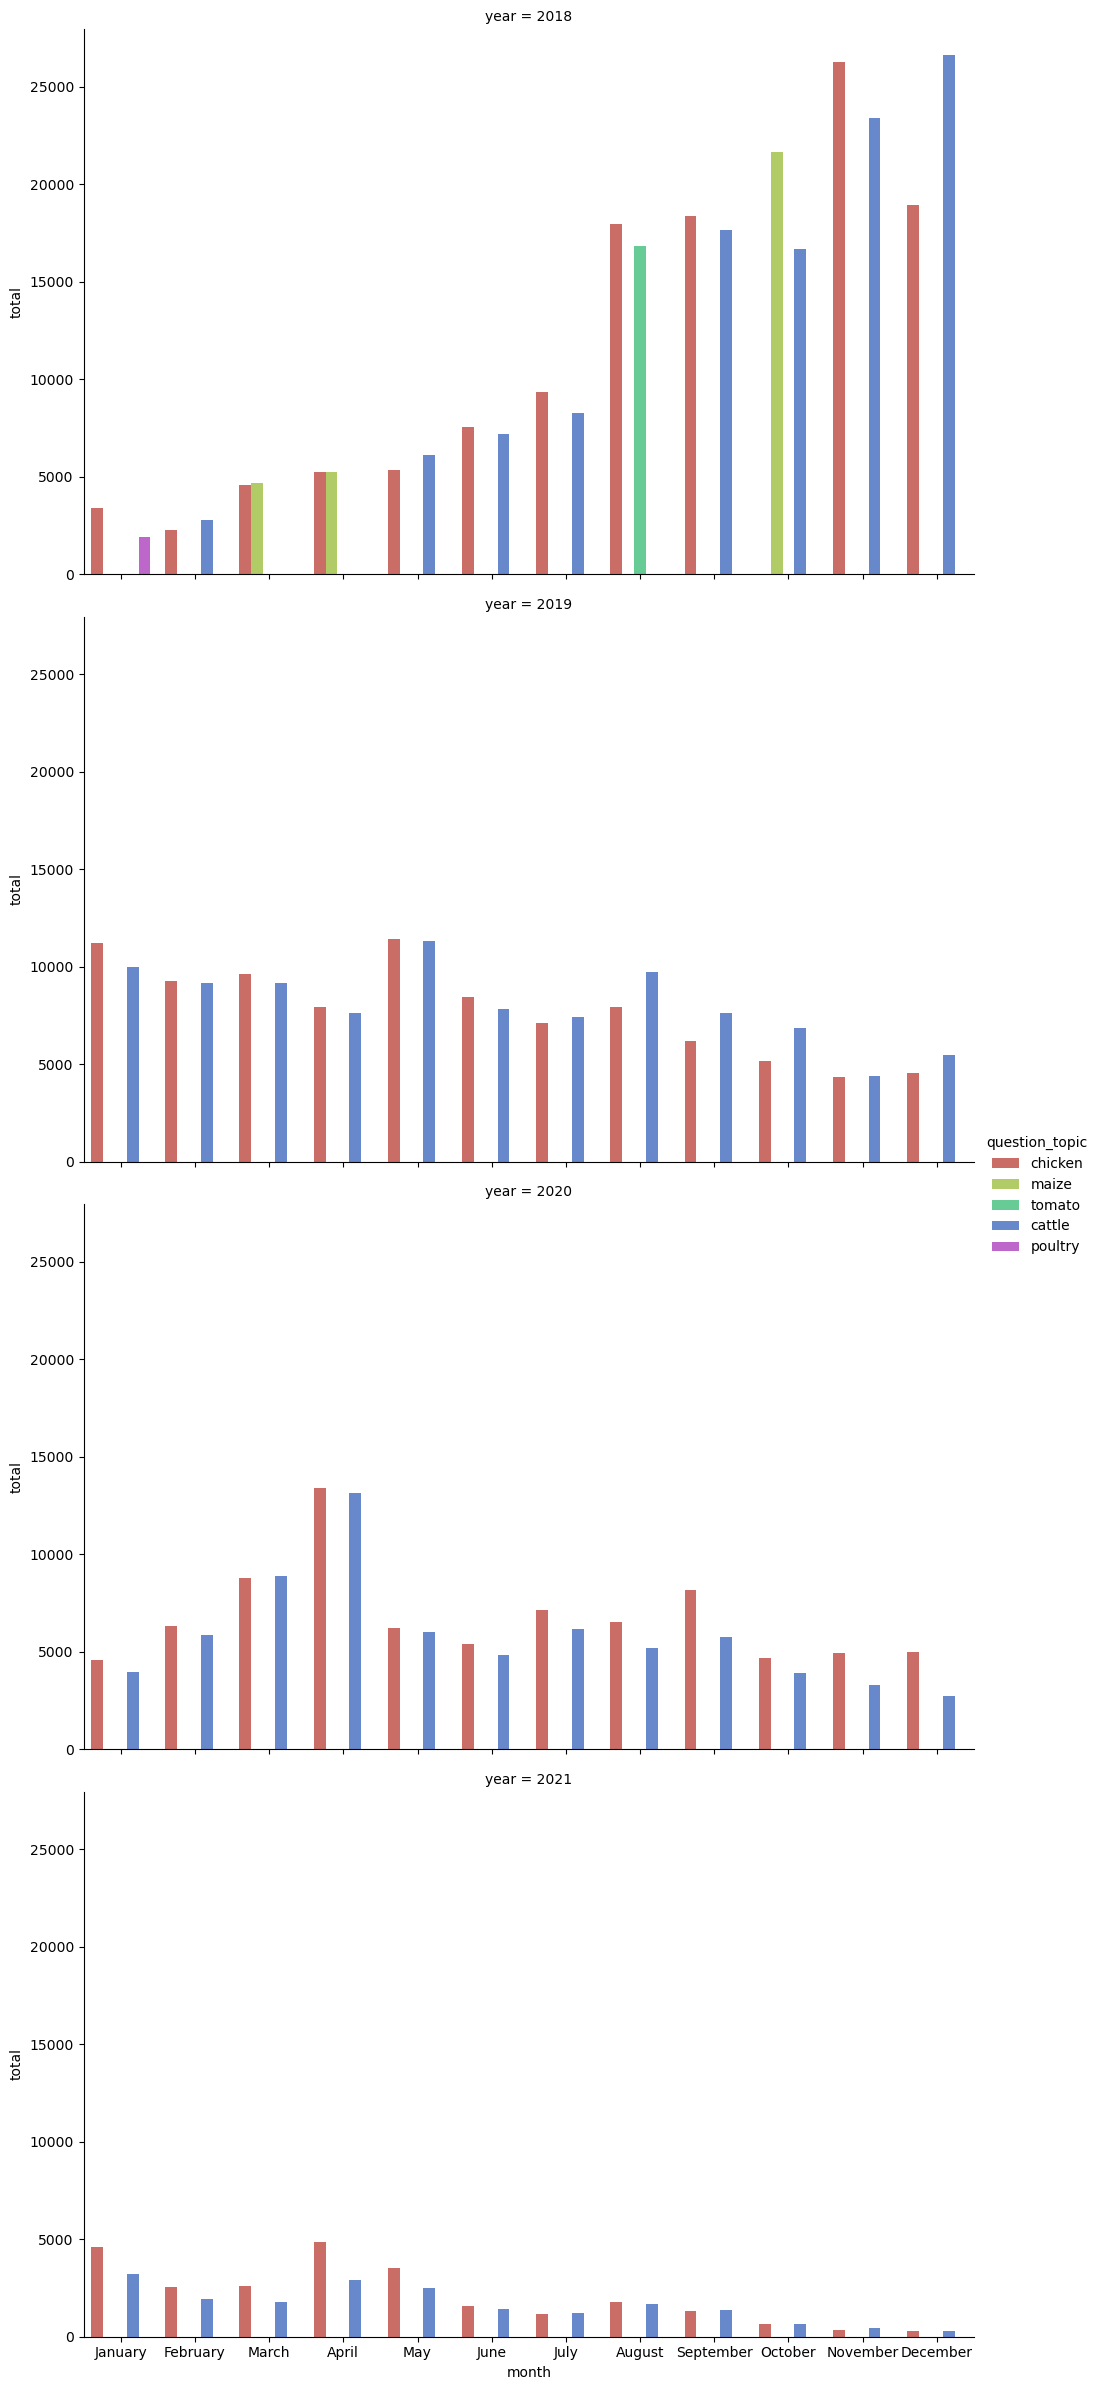

In [12]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=ke_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Tanzania Excluding Missing Values

In [13]:
tz_no_pred_plot = tz_no_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
tz_no_pred_plot = tz_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
tz_no_pred_plot = tz_no_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

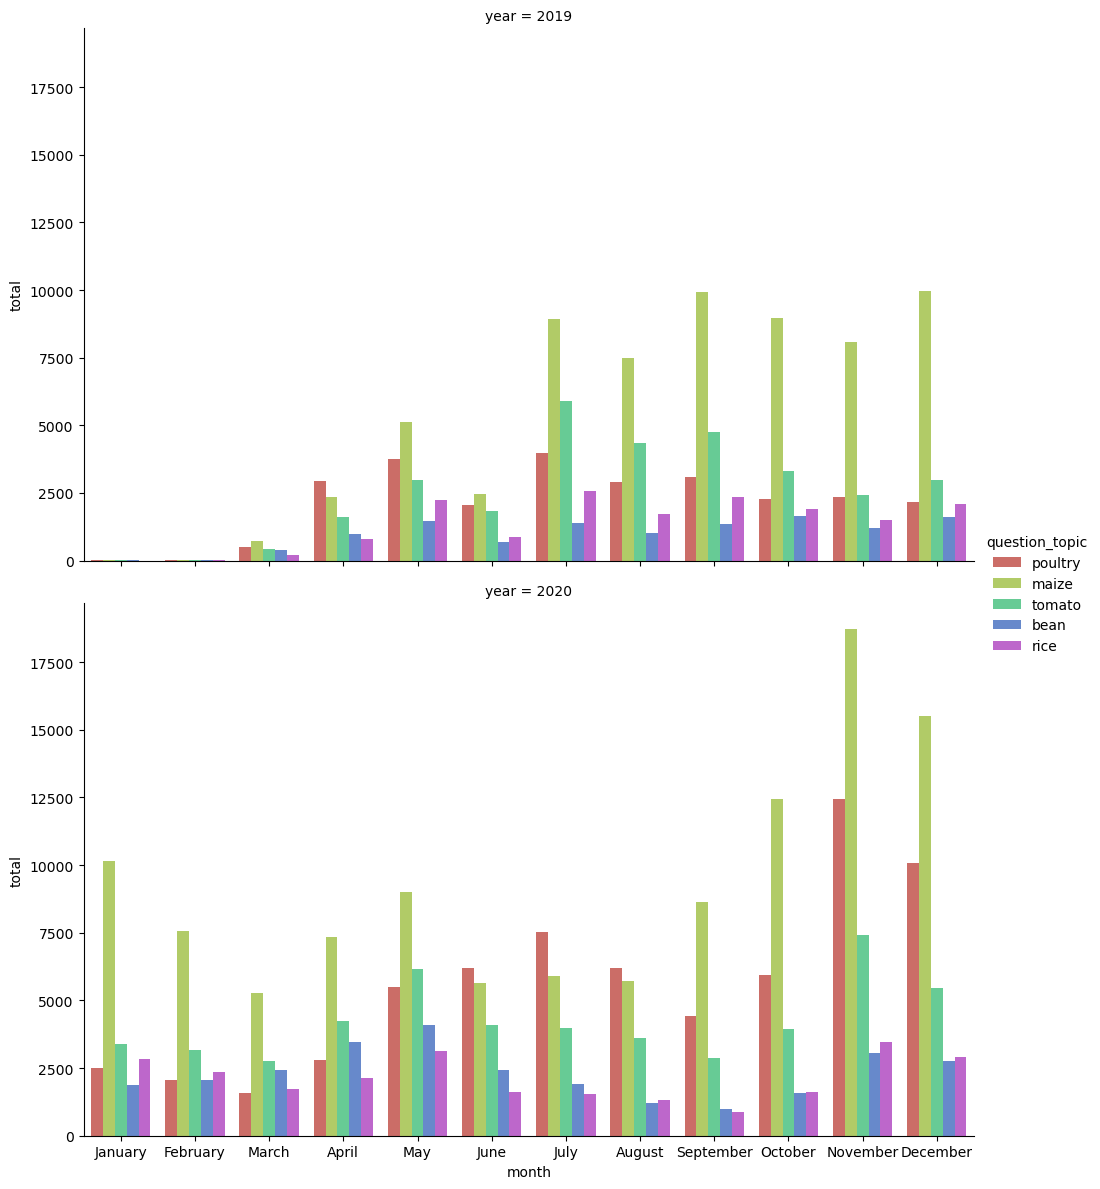

In [14]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=tz_no_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Tanzania Including Predicted Values For Missing Values

In [15]:
tz_pred_plot = tz_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
tz_pred_plot = tz_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
tz_pred_plot = tz_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

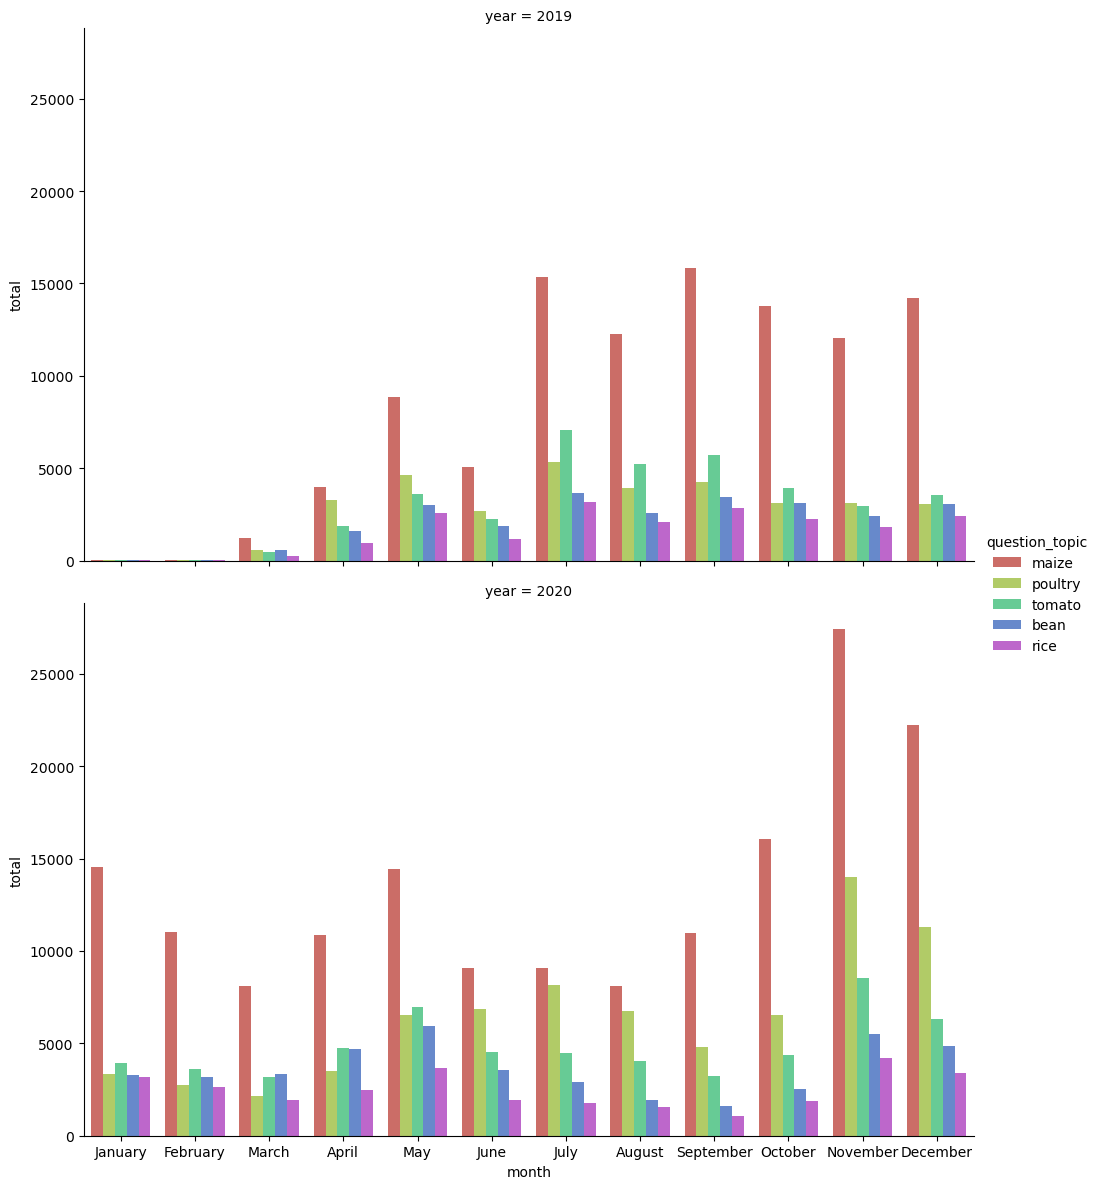

In [16]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=tz_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Uganda Excluding Missing Values

In [17]:
ug_no_pred_plot = ug_no_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
ug_no_pred_plot = ug_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ug_no_pred_plot = ug_no_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

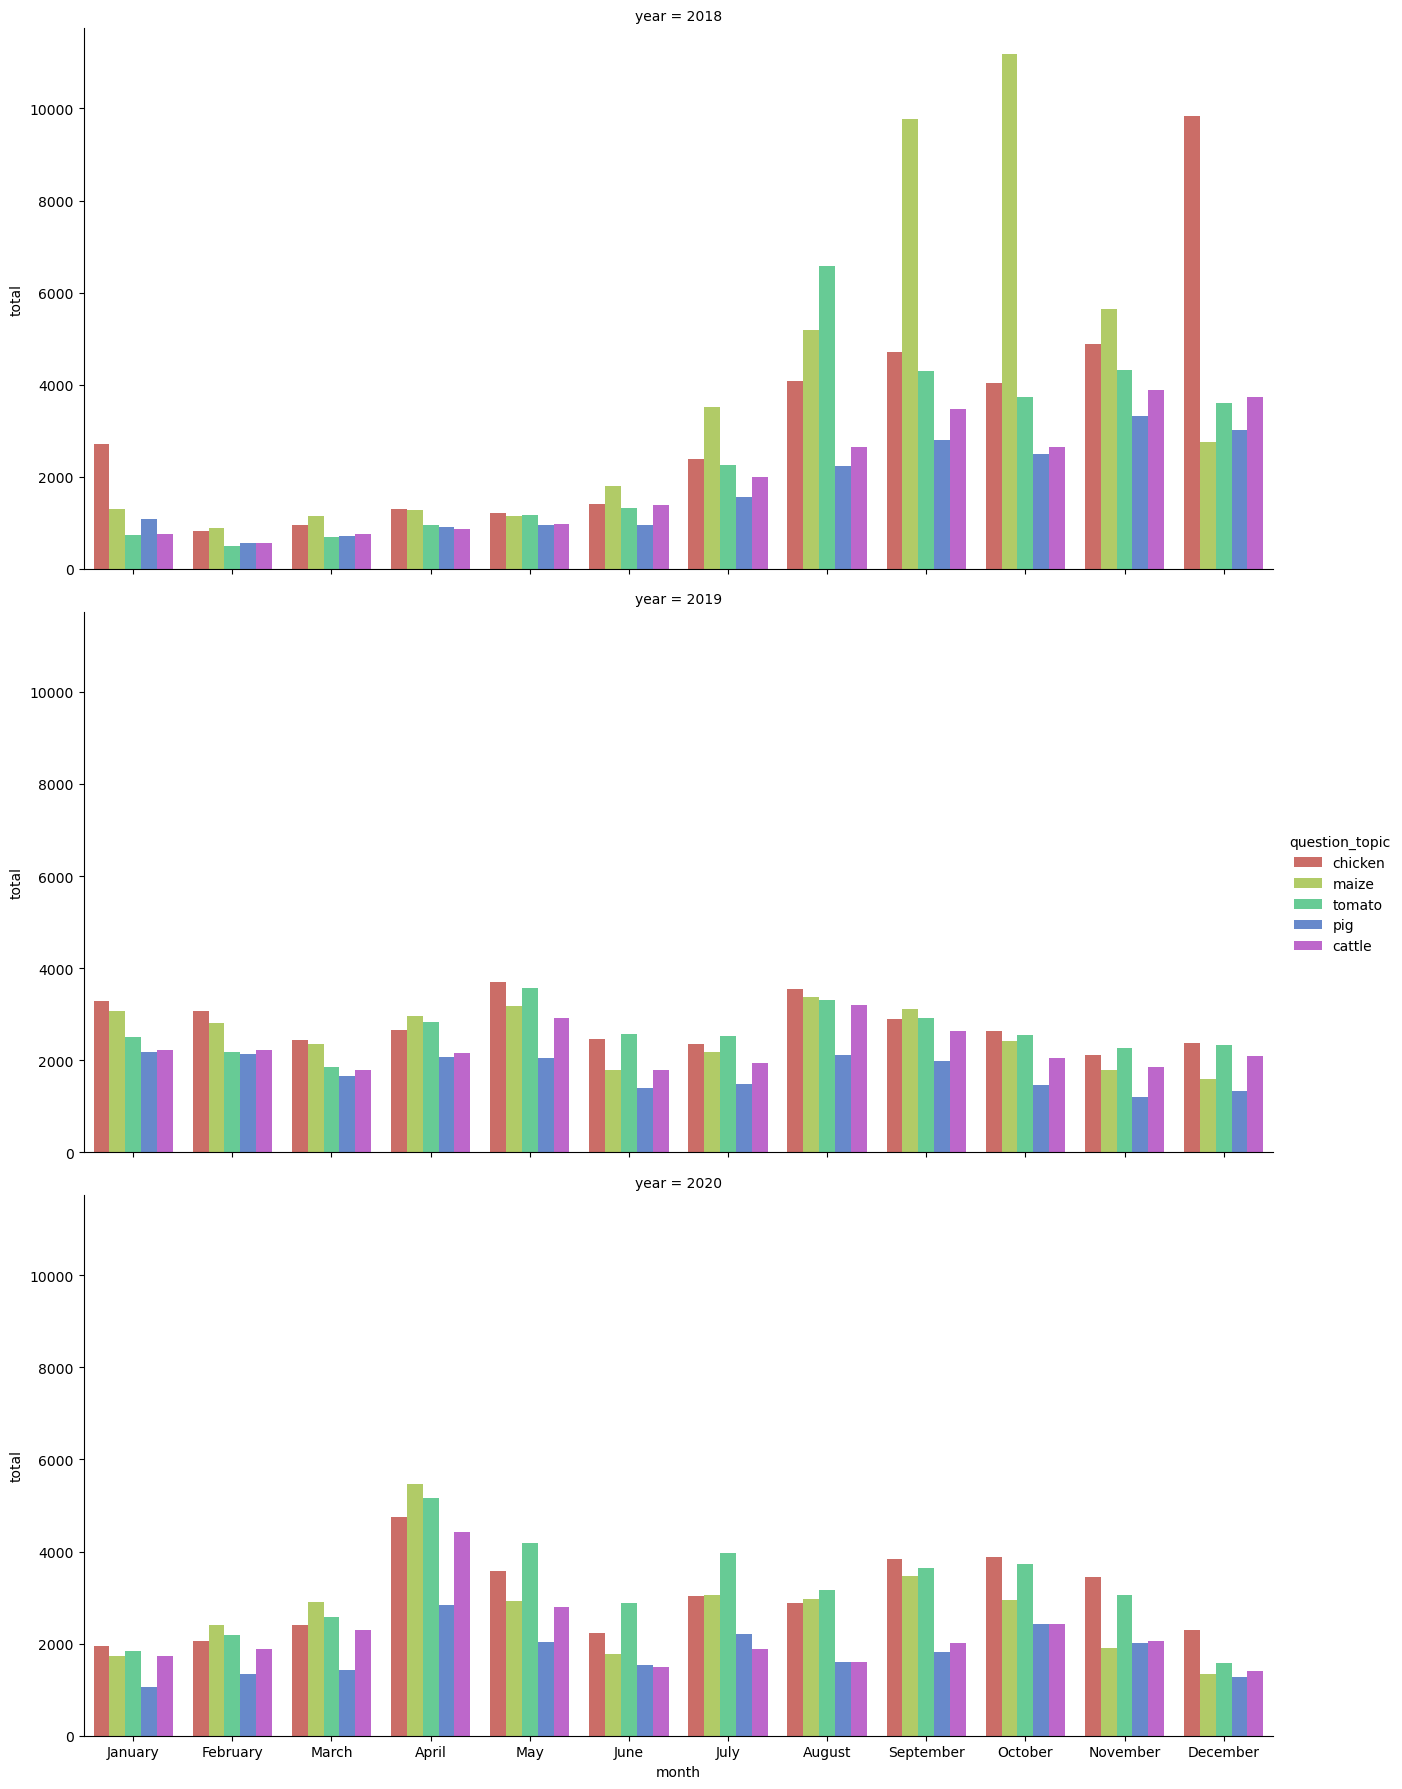

In [18]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=ug_no_pred_plot, kind='bar',
            height=6, aspect=13/6, legend=True, palette='hls', order=month_list)

### Uganda Including Predicted Values For Missing Values

In [19]:
ug_pred_plot = ug_pred.groupby(['year','month','question_topic']).agg(total=('question_topic','count'))
ug_pred_plot = ug_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ug_pred_plot = ug_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

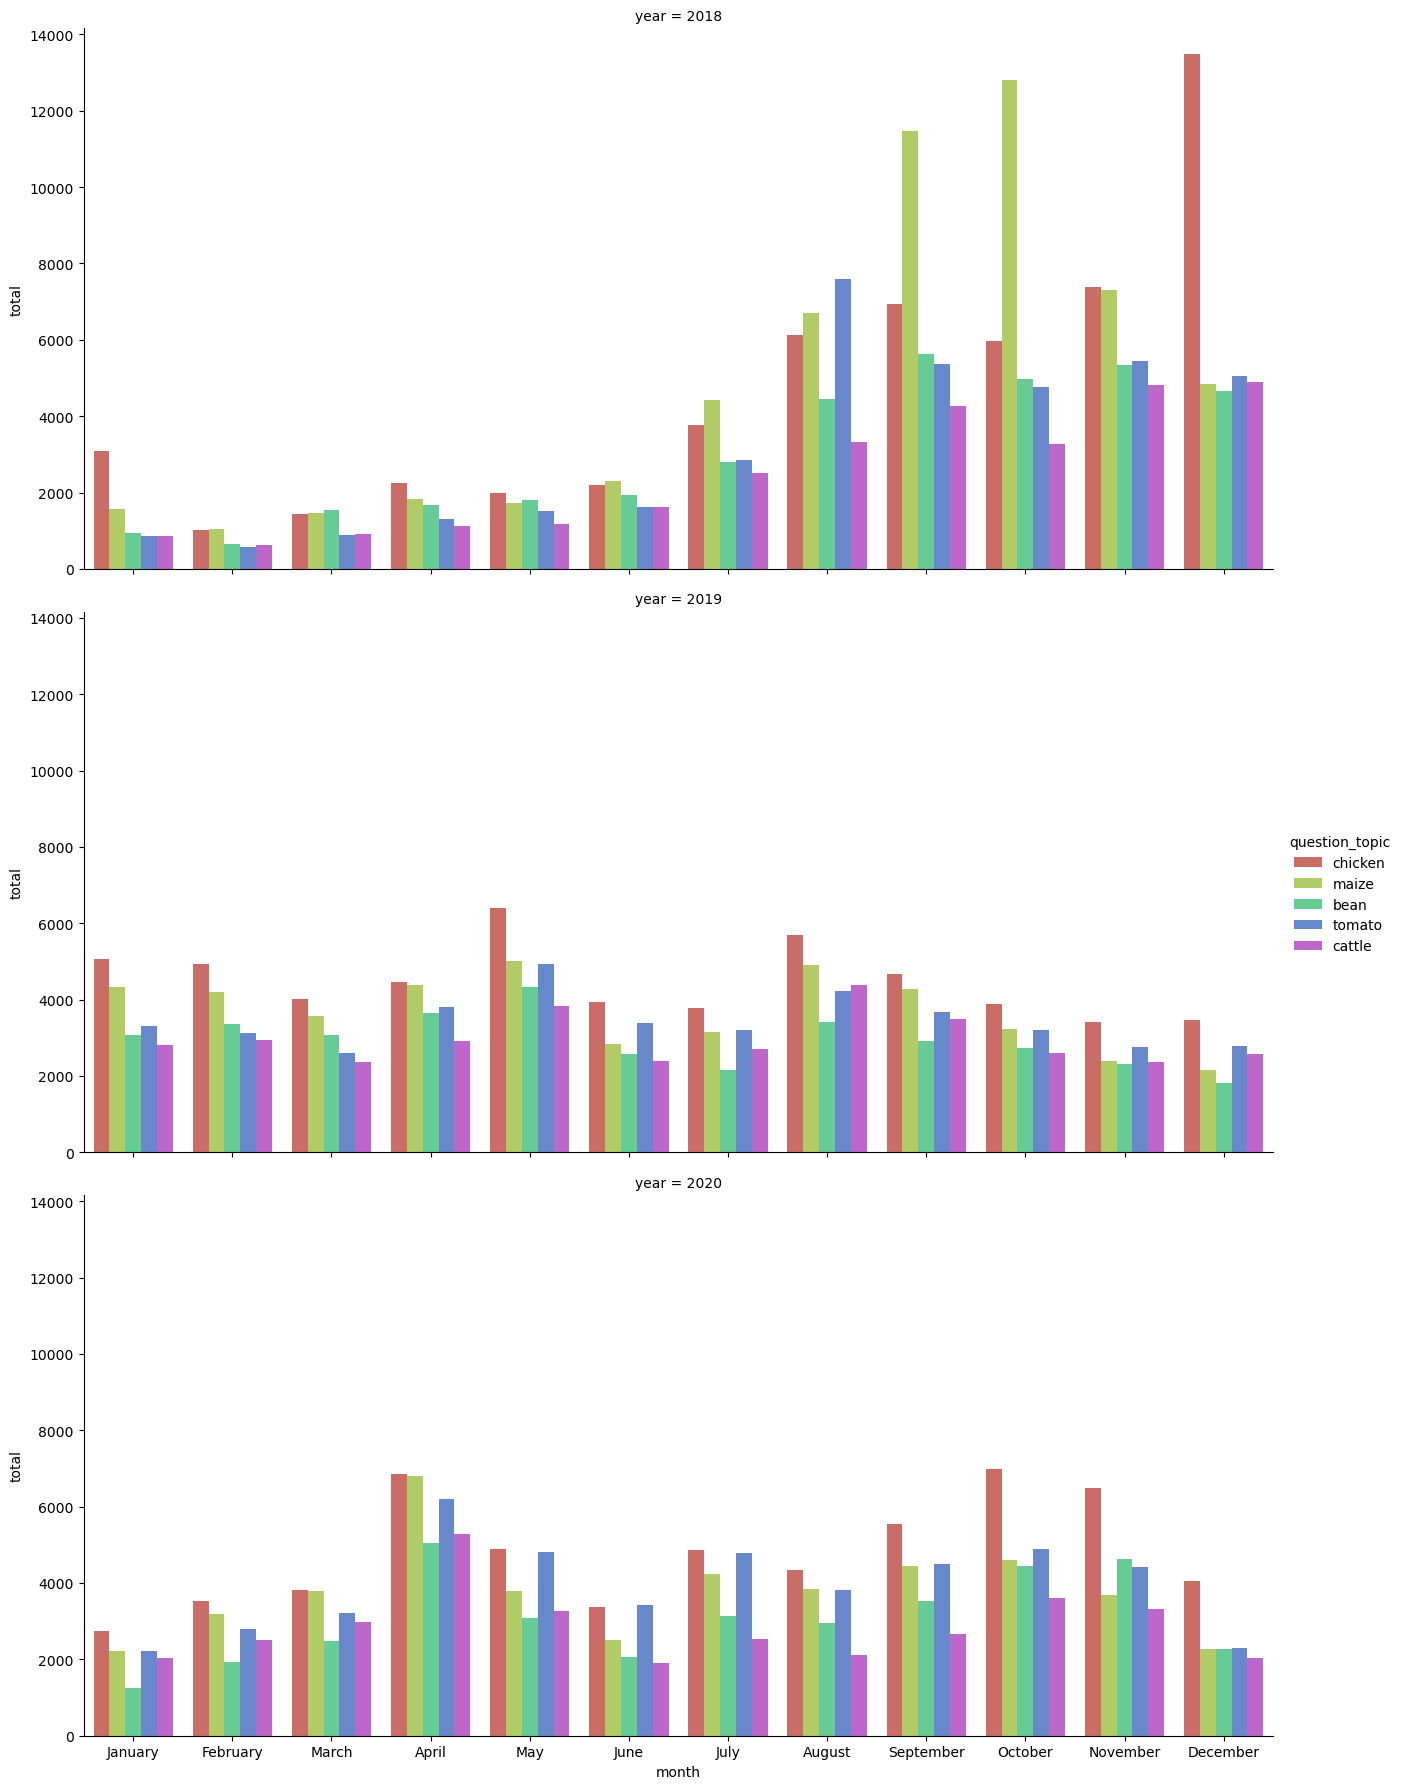

In [20]:
sns.catplot(x='month', y='total', hue='question_topic',row='year', data=ug_pred_plot, kind='bar',
            height=6, aspect=13/6, legend=True, palette='hls', order=month_list)